In [1]:
import torch, os, mlflow
import matplotlib.pyplot as plt, numpy as np
from mlflow_helper import load_attack_results, load_from_db
from itertools import chain

In [2]:
def get_min_max(success_rate):
    try:
        mins = torch.amin(torch.stack(success_rate), dim=0)
        maxs = torch.amax(torch.stack(success_rate), dim=0)
    except TypeError:
        mins = torch.amin(success_rate, dim=0)
        maxs = torch.amax(success_rate, dim=0)
    
    return mins, maxs

In [12]:
C_da_run_names = [1668278459, 1668279489, 1668283177, 1668284221, 1668289478, 1668296690, 1668302862,
                  1668309303, 1668319357, 1668343081, 1668361949,
                  1667595706, 1667596857, 1667601900, 1667605502, 1667608612, 1667612994, 1667616670,
                  1667628509, 1667636483, 1667643891, 1667673814,
                  1667729890, 1667731294, 1667741670, 1667748173, 1667753694, 1667759783, 1667764930,
                  1667783231, 1667805435, 1667810776, 1667881002]

S2_da_run_names = [1668559990, 1668568059, 1668578286, 1668598496, 1668637573,
                   1667922245, 1667928002, 1667949243, 1667987238, 1668030960,
                   1668051244, 1668063693, 1668085318, 1668110081, 1668139362]

CC_da_run_names = [1699215797, 1699220532, 1699227803, 1699237519, 1699243450, 1699259138, 1699273961,
                   1699287174, 1699299425, 1699319344, 1699423670,
                   1699905863, 1699908587, 1699916489, 1699935953, 1699945381, 1699966198, 1700001988,
                   1700030704, 1700040450, 1700086384, 1700257473,
                   1699488018, 1699492817, 1699502906, 1699514851, 1699528834, 1699543905, 1699580225,
                   1699590658, 1699629072, 1699686514, 1699732031]

C_run_names = [1671715247, 1671716139, 1671717283, 1671720334, 1671724685, 1671725735,
               1671729865, 1671731670, 1671732445, 1671737087, 1671738763, 1671742022,
               1671748092, 1671749485, 1671751498, 1671754409, 1671757292, 1671760833]

CC_run_names = [1700326898, 1700330347, 1700335505, 1700337615, 1700345124, 1700356650,
                1700364673, 1700368102, 1700375258, 1700385315, 1700398273, 1700412164,
                1700421540, 1700428997, 1700434626, 1700440151, 1700459504, 1700463715]

f_S2_da_run_names = []

f_CC_da_run_names =[]

f_S2_run_names = []

f_C_run_names = []

f28_S2_da_run_names = []

f28_C_da_run_names = [1698766325, 1698768397, 1698770664, 1698771523, 1698775831, 1698779581,
                      1698978834, 1698980137, 1698981341, 1698982635, 1698986725, 1698989944,
                      1698992825, 1698993245, 1698995601, 1698998473, 1699001088, 1699002836]

f28_CC_da_run_names = [1697632034, 1697633409, 1697635738, 1697638647, 1697643509, 1697644887,
                       1697670845, 1697672621, 1697673977, 1697676458, 1697679758, 1697684622,
                       1697649945, 1697650878, 1697652505, 1697658380, 1697663547, 1697665587]

f28_MLP_da_run_names = [1697314773, 1697315648, 1697316253, 1697319666, 1697321134, 1697323039,
                        1697381703, 1697387805, 1697392047, 1697395958, 1697423371,
                        1697326227, 1697327407, 1697329265, 1697330634, 1697334107, 1697335845,
                        1697438899, 1697441419, 1697445309, 1697454414, 1697470261,
                        1697339675, 1697340366, 1697342252, 1697344299, 1697346310, 1697348476,
                        1697493565, 1697500831, 1697507810, 1697517942, 1697522106,
                        1697351878, 1697352331, 1697353302, 1697355022, 1697356907, 1697357777,
                        1697556854, 1697557558, 1697562076, 1697563004, 1697575214,
                        1697359818, 1697360773, 1697363594, 1697364527, 1697368366, 1697373536,
                        1697581673, 1697587785, 1697595752, 1697602209, 1697615182]

f28_S2_run_names = [1696930897, 1696932144, 1696936674, 1696941636, 1696947668, 1696954063,
                    1697043800, 1697050764, 1697052959, 1697061474, 1697073402, 1697084768,
                    1697091799, 1697096372, 1697103093, 1697110031, 1697121241, 1697134502]

f28_C_run_names = [1697206030, 1697206644, 1697207683, 1697209477, 1697210525, 1697213123,
                   1697226035, 1697226722, 1697228695, 1697229854, 1697231110, 1697236373,
                   1697215830, 1697217421, 1697217912, 1697220416, 1697221465, 1697224525]

f28_CC_run_names = [1698751219, 1698751559, 1698754950, 1698757664, 1698760718, 1698764481,
                    1698939890, 1698941404, 1698944388, 1698947570, 1698952241, 1698953882,
                    1698959274, 1698960132, 1698963429, 1698966845, 1698969603, 1698974850]

f28_MLP_run_names = [1697263106, 1697264117, 1697264852, 1697266762, 1697267108, 1697269780, 1697270716,
                     1697271049, 1697271795, 1697274594, 1697275265, 1697278699, 1697282534, 1697282725,
                     1697283628, 1697285267, 1697286841, 1697289516, 1697291360, 1697291756, 1697292309,
                     1697293673, 1697296087, 1697297687, 1697298663, 1697299099, 1697300189, 1697301644,
                     1697303700, 1697304939]

In [5]:
C_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in C_da_run_names]
C_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in C_da_run_names]
C_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in C_da_run_names]
C_da_params = load_attack_results(C_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [6]:
S2_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in S2_da_run_names]
S2_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2_da_run_names]
S2_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2_da_run_names]
S2_da_params = load_attack_results(S2_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [13]:
CC_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in CC_da_run_names]
CC_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in CC_da_run_names]
CC_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in CC_da_run_names]
CC_da_params = load_attack_results(CC_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
C_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in C_run_names]
C_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in C_run_names]
C_total_params = [load_from_db(run_name, 'params.total_params') for run_name in C_run_names]
C_params = load_attack_results(C_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
CC_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in CC_run_names]
CC_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in CC_run_names]
CC_total_params = [load_from_db(run_name, 'params.total_params') for run_name in CC_run_names]
CC_params = load_attack_results(CC_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_C_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_C_da_run_names]
f28_C_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_C_da_run_names]
f28_C_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_C_da_run_names]
f28_C_da_params = load_attack_results(f28_C_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_CC_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_CC_da_run_names]
f28_CC_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_CC_da_run_names]
f28_CC_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_CC_da_run_names]
f28_CC_da_params = load_attack_results(f28_CC_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_MLP_da_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_MLP_da_run_names]
f28_MLP_da_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_MLP_da_run_names]
f28_MLP_da_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_MLP_da_run_names]
f28_MLP_da_params = load_attack_results(f28_MLP_da_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_S2_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_S2_run_names]
f28_S2_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_S2_run_names]
f28_S2_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_S2_run_names]
f28_S2_params = load_attack_results(f28_S2_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_S2_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_S2_run_names]
f28_S2_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_S2_run_names]
f28_S2_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_S2_run_names]
f28_S2_params = load_attack_results(f28_S2_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_C_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_C_run_names]
f28_C_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_C_run_names]
f28_C_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_C_run_names]
f28_C_params = load_attack_results(f28_C_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_CC_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_CC_run_names]
f28_CC_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_CC_run_names]
f28_CC_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_CC_run_names]
f28_CC_params = load_attack_results(f28_CC_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

In [ ]:
f28_MLP_success_rate = [load_attack_results(run_name, 'LinfProjectedGradientDescentAttack', 'success_rate.pickle') for run_name in f28_MLP_run_names]
f28_MLP_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in f28_MLP_run_names]
f28_MLP_total_params = [load_from_db(run_name, 'params.total_params') for run_name in f28_MLP_run_names]
f28_MLP_params = load_attack_results(f28_MLP_run_names[0], 'LinfProjectedGradientDescentAttack', 'params.pickle')

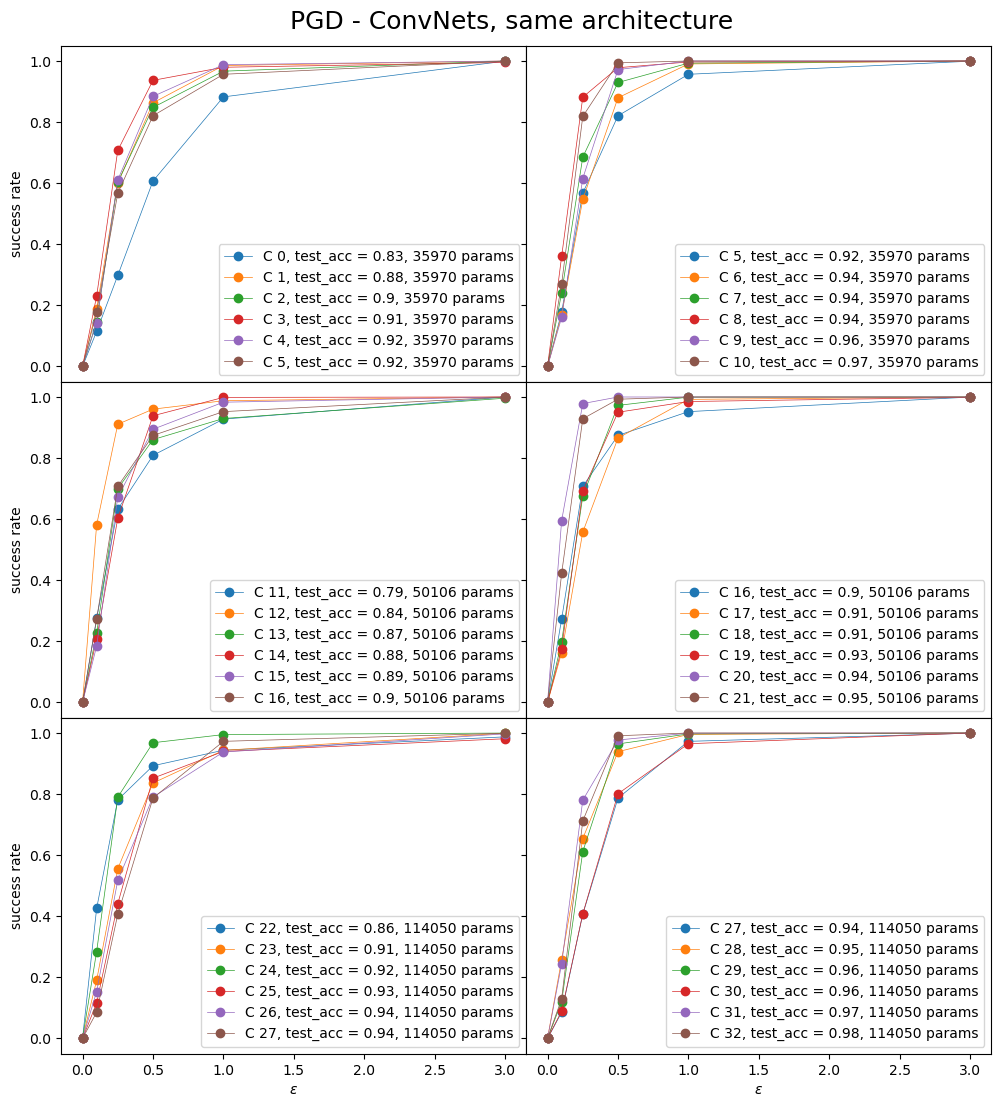

In [20]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 12), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - ConvNets, same architecture', fontsize=18)
plt.subplots_adjust(top=0.95)

for i in range(6):
    axs[0,0].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")
    
for i in range(5,11):
    axs[0,1].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")
    
for i in range(11,17):
    axs[1,0].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")
    
for i in range(16,22):
    axs[1,1].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")
    
for i in range(22,28):
    axs[2,0].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")
    
for i in range(27,33):
    axs[2,1].plot(C_da_params['epsilons'][:6], C_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"C {i}, test_acc = {C_da_clean_test_accs[i]:.{2}}, {C_da_total_params[i]} params")

for j in range(3):
    axs[j,0].set_ylabel('success rate')
for j in range(2):
    axs[2,j].set_xlabel('$\epsilon$')
    for k in range(3):
        axs[k,j].legend()

# plt.savefig('PGD_bl_same_arch.pdf', bbox_inches="tight")
plt.show()

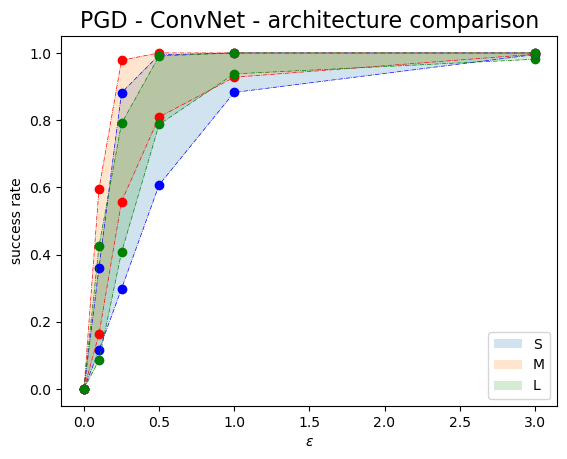

In [19]:
alpha = 0.2
plt.title('PGD - ConvNet - architecture comparison', fontsize=16)
for i in range(2):
    plt.plot(C_da_params['epsilons'][:6], get_min_max(C_da_success_rate[0:11])[i][:6], 'o-.', color='b', linewidth=0.5)
    plt.plot(C_da_params['epsilons'][:6], get_min_max(C_da_success_rate[11:22])[i][:6], 'o-.', color='r', linewidth=0.5)
    plt.plot(C_da_params['epsilons'][:6], get_min_max(C_da_success_rate[22:33])[i][:6], 'o-.', color='g', linewidth=0.5)

plt.fill_between(C_da_params['epsilons'][:6], *get_min_max(torch.stack(C_da_success_rate)[0:11,:6]), label=f"S", alpha=alpha)
plt.fill_between(C_da_params['epsilons'][:6], *get_min_max(torch.stack(C_da_success_rate)[11:22,:6]), label=f"M", alpha=alpha)
plt.fill_between(C_da_params['epsilons'][:6], *get_min_max(torch.stack(C_da_success_rate)[22:33,:6]), label=f"L", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_arch_comp.pdf', bbox_inches="tight")
plt.show()

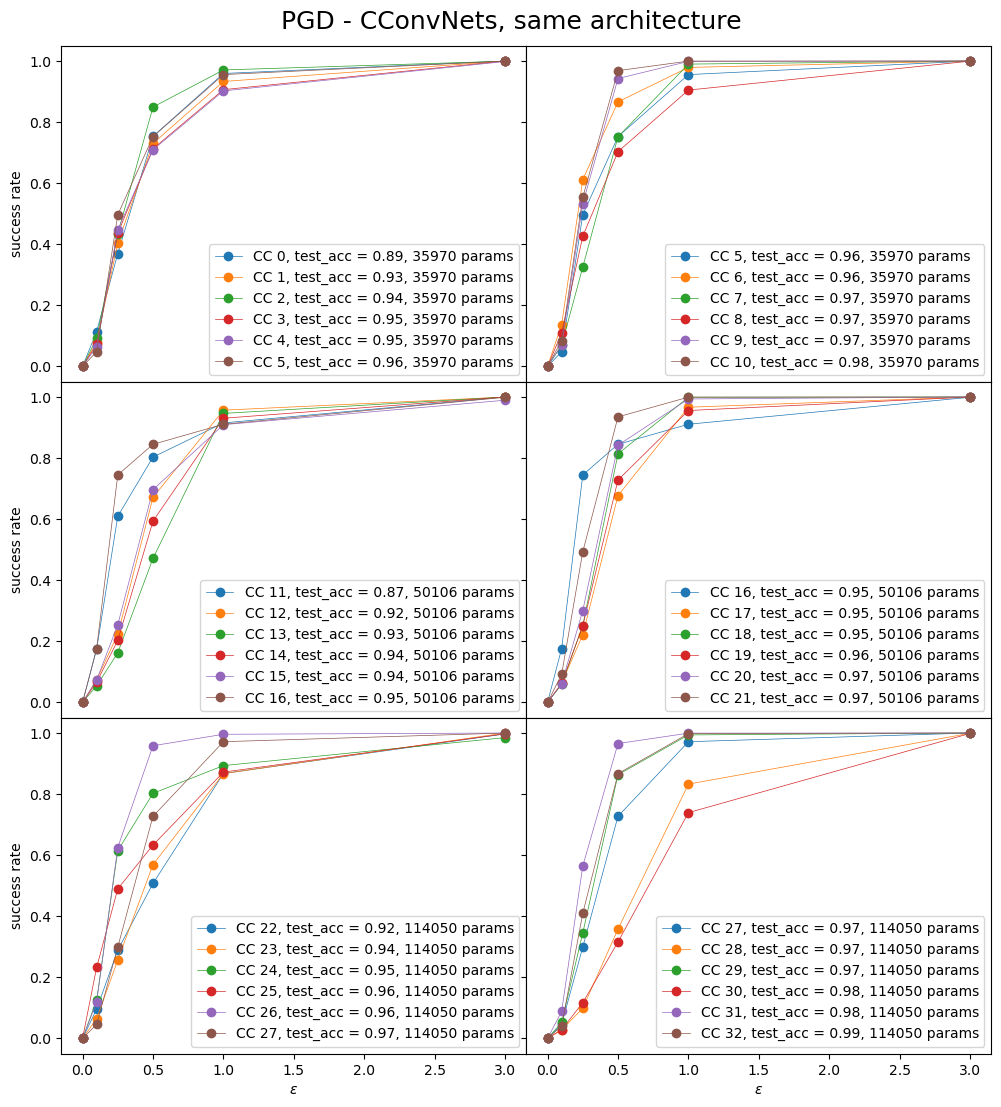

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (12, 12), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - CConvNets, same architecture', fontsize=18)
plt.subplots_adjust(top=0.95)

for i in range(6):
    axs[0,0].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")
    
for i in range(5,11):
    axs[0,1].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")
    
for i in range(11,17):
    axs[1,0].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")
    
for i in range(16,22):
    axs[1,1].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")
    
for i in range(22,28):
    axs[2,0].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")
    
for i in range(27,33):
    axs[2,1].plot(CC_da_params['epsilons'][:6], CC_da_success_rate[i][:6], 'o-', linewidth=0.5, label=f"CC {i}, test_acc = {CC_da_clean_test_accs[i]:.{2}}, {CC_da_total_params[i]} params")

for j in range(3):
    axs[j,0].set_ylabel('success rate')
for j in range(2):
    axs[2,j].set_xlabel('$\epsilon$')
    for k in range(3):
        axs[k,j].legend()

# plt.savefig('PGD_.pdf', bbox_inches="tight")
plt.show()

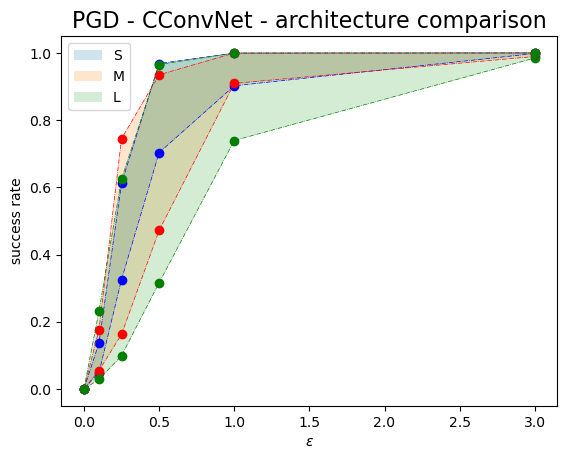

In [23]:
alpha = 0.2
plt.title('PGD - CConvNet - architecture comparison', fontsize=16)
for i in range(2):
    plt.plot(CC_da_params['epsilons'][:6], get_min_max(CC_da_success_rate[0:11])[i][:6], 'o-.', color='b', linewidth=0.5)
    plt.plot(CC_da_params['epsilons'][:6], get_min_max(CC_da_success_rate[11:22])[i][:6], 'o-.', color='r', linewidth=0.5)
    plt.plot(CC_da_params['epsilons'][:6], get_min_max(CC_da_success_rate[22:33])[i][:6], 'o-.', color='g', linewidth=0.5)

plt.fill_between(CC_da_params['epsilons'][:6], *get_min_max(torch.stack(CC_da_success_rate)[0:11,:6]), label=f"S", alpha=alpha)
plt.fill_between(CC_da_params['epsilons'][:6], *get_min_max(torch.stack(CC_da_success_rate)[11:22,:6]), label=f"M", alpha=alpha)
plt.fill_between(CC_da_params['epsilons'][:6], *get_min_max(torch.stack(CC_da_success_rate)[22:33,:6]), label=f"L", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_.pdf', bbox_inches="tight")
plt.show()

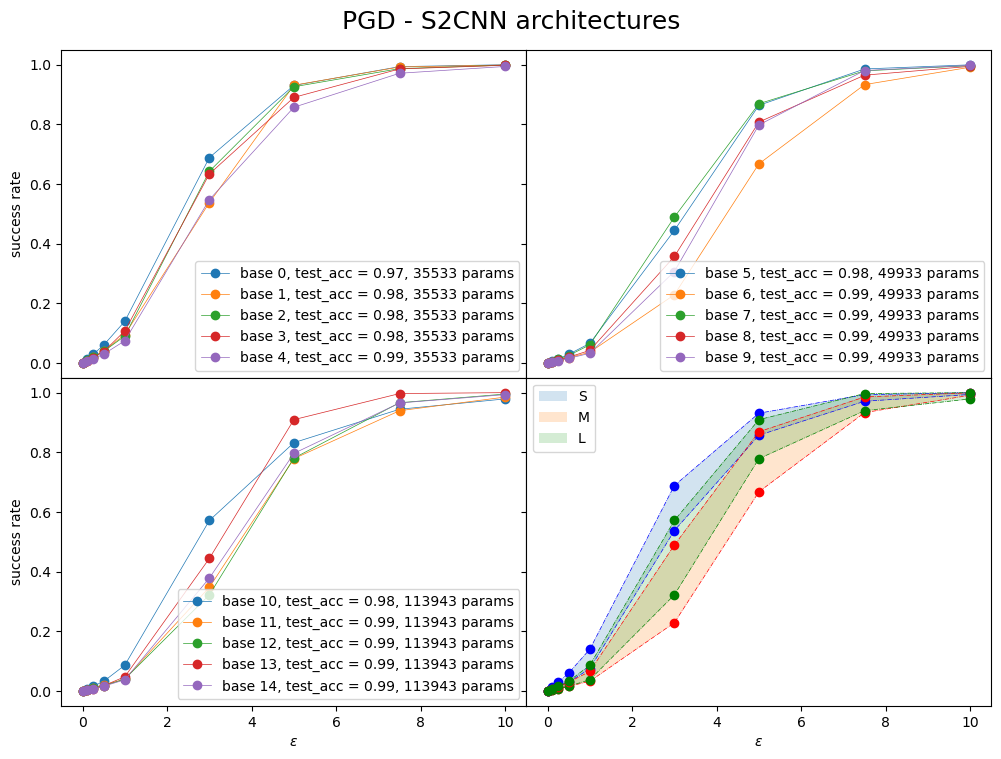

In [16]:
alpha = 0.2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 8), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('PGD - S2CNN architectures', fontsize=18)
plt.subplots_adjust(top=0.93)

for i in range(5):
    axs[0,0].plot(S2_da_params['epsilons'], S2_da_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {S2_da_clean_test_accs[i]:.{2}}, {S2_da_total_params[i]} params")
    
for i in range(5,10):
    axs[0,1].plot(S2_da_params['epsilons'], S2_da_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {S2_da_clean_test_accs[i]:.{2}}, {S2_da_total_params[i]} params")
    
for i in range(10,15):
    axs[1,0].plot(S2_da_params['epsilons'], S2_da_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {S2_da_clean_test_accs[i]:.{2}}, {S2_da_total_params[i]} params")
    
for i in range(2):
    axs[1,1].plot(S2_da_params['epsilons'], get_min_max(S2_da_success_rate[0:5])[i], 'o-.', color='b', linewidth=0.5)
    axs[1,1].plot(S2_da_params['epsilons'], get_min_max(S2_da_success_rate[5:10])[i], 'o-.', color='r', linewidth=0.5)
    axs[1,1].plot(S2_da_params['epsilons'], get_min_max(S2_da_success_rate[10:15])[i], 'o-.', color='g', linewidth=0.5)
plt.fill_between(S2_da_params['epsilons'], *get_min_max(S2_da_success_rate[0:5]), label=f"S", alpha=alpha)
plt.fill_between(S2_da_params['epsilons'], *get_min_max(S2_da_success_rate[5:10]), label=f"M", alpha=alpha)
plt.fill_between(S2_da_params['epsilons'], *get_min_max(S2_da_success_rate[10:15]), label=f"L", alpha=alpha)
  
for j in range(2):
    axs[1,j].set_xlabel('$\epsilon$')
    axs[j,0].set_ylabel('success rate')
    for k in range(2):
        axs[k,j].legend()

# plt.savefig('PGD_S2CNN_arch_comp.pdf', bbox_inches="tight")
plt.show()

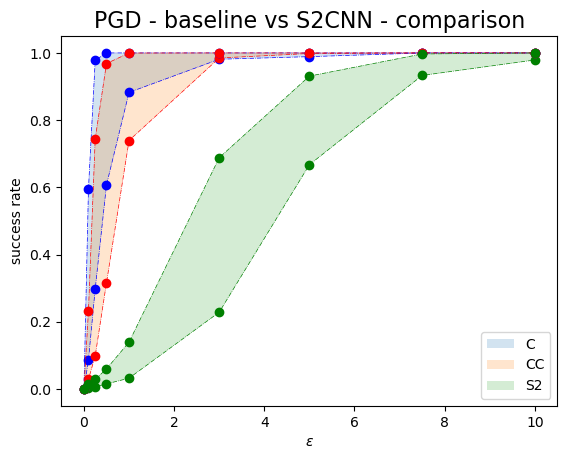

In [17]:
alpha = 0.2
plt.title('PGD - baseline vs S2CNN - comparison', fontsize=16)
for i in range(2):
    plt.plot(C_da_params['epsilons'], get_min_max(C_da_success_rate)[i], 'o-.', color='b', linewidth=0.5)
    plt.plot(CC_da_params['epsilons'], get_min_max(CC_da_success_rate)[i], 'o-.', color='r', linewidth=0.5)
    plt.plot(S2_da_params['epsilons'], get_min_max(S2_da_success_rate)[i], 'o-.', color='g', linewidth=0.5)

plt.fill_between(C_da_params['epsilons'], *get_min_max(C_da_success_rate), label=f"C", alpha=alpha)
plt.fill_between(CC_da_params['epsilons'], *get_min_max(CC_da_success_rate), label=f"CC", alpha=alpha)
plt.fill_between(S2_da_params['epsilons'], *get_min_max(S2_da_success_rate), label=f"S2", alpha=alpha)

plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('PGD_bl_vs_S2CNN.pdf', bbox_inches="tight")
plt.show()